Changes from v2.0 to v2.1

change sbram named cosmic_ray_veto_thresh_rate3 to cosmic_ray_veto_thresh_rate2

change sbram named cosmic_ray_core_ant_veto_rate to cosmic_ray_core_and_veto_rate

Make SBRAM address widths 5 not 6 and 1 not 2.

Add 1 delay before data output of threshold counting blocks.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import casperfpga
import time
from lwa_f import snap2_fengine
import pandas as pd
from cr_functions import *
import struct
import math

In [5]:
fpgfile="/home/ubuntu/kplant/caltech-lwa/snap2_f_200msps_64i_4096c/outputs/snap2_f_200msps_64i_4096c_2021-09-23_1421.fpg"
brdname='snap03'

## First try with cosmic ray system version 2.0  

In [6]:
fpgfile="/home/ubuntu/kplant/caltech-lwa/snap2_f_200msps_64i_4096c/outputs/snap2_f_200msps_64i_4096c_2021-09-23_1421.fpg"
brdname='snap03'

In [8]:
#load firmware and initialize etc
brd=snap2_fengine.Snap2Fengine(brdname)
brd.program(fpgfile)
brd.initialize(read_only=False)
brd.sync.arm_sync()
brd.sync.sw_sync()

2021-09-27 16:39:15,831 - lwa_f.blocks.block:snap03 - WARNING -  - hostname (10.40.0.188) couldn't be turned into integer serial
2021-09-27 16:39:16,126 - lwa_f.blocks.block:snap03 - INFO - adc - Detected FMC ADC board on port 0
2021-09-27 16:39:16,421 - lwa_f.blocks.block:snap03 - INFO - adc - Detected FMC ADC board on port 1
2021-09-27 16:39:16,436 - lwa_f.snap2_fengine:snap03 - INFO - Loading firmware /home/ubuntu/kplant/caltech-lwa/snap2_f_200msps_64i_4096c/outputs/snap2_f_200msps_64i_4096c_2021-09-23_1421.fpg to snap03
2021-09-27 16:39:41,689 - lwa_f.blocks.block:snap03 - WARNING -  - hostname (10.40.0.188) couldn't be turned into integer serial
2021-09-27 16:39:41,985 - lwa_f.blocks.block:snap03 - INFO - adc - Detected FMC ADC board on port 0
2021-09-27 16:39:42,279 - lwa_f.blocks.block:snap03 - INFO - adc - Detected FMC ADC board on port 1
2021-09-27 16:39:42,293 - lwa_f.snap2_fengine:snap03 - INFO - Initializing block (writable): fpga
2021-09-27 16:39:42,294 - lwa_f.snap2_fengi

2021-09-27 16:40:04,838 - lwa_f.blocks.block:snap03 - INFO - adc - FMC 0 data lane delays:
[[312, 296, 304, 296, 296, 296, 296, 296], [344, 336, 336, 328, 336, 328, 328, 336], [288, 288, 288, 288, 288, 288, 296, 296], [328, 336, 328, 320, 328, 328, 328, 328], [288, 280, 288, 280, 288, 288, 288, 288], [272, 272, 288, 272, 272, 272, 272, 272], [304, 280, 288, 288, 288, 296, 288, 280], [288, 288, 296, 288, 288, 304, 304, 288]]
2021-09-27 16:40:04,838 - lwa_f.blocks.block:snap03 - INFO - adc - FMC 0 data lane slacks:
[[40, 40, 40, 40, 40, 40, 40, 40], [40, 40, 40, 40, 40, 40, 40, 40], [40, 40, 40, 40, 40, 40, 40, 32], [40, 32, 40, 40, 40, 40, 40, 32], [40, 32, 40, 32, 40, 40, 40, 40], [40, 40, 40, 40, 40, 40, 40, 40], [40, 32, 40, 40, 40, 32, 40, 32], [32, 32, 32, 32, 32, 32, 32, 32]]
2021-09-27 16:40:04,839 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 0, Lane 0:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXX
2021-09-27 16:40:04,840 - lwa_f.blocks.block:snap03 - INF

2021-09-27 16:40:04,870 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 6, Lane 2:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXX
2021-09-27 16:40:04,871 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 6, Lane 3:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXX
2021-09-27 16:40:04,872 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 6, Lane 4:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXX
2021-09-27 16:40:04,872 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 6, Lane 5:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXX
2021-09-27 16:40:04,873 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 6, Lane 6:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXX
2021-09-27 16:40:04,873 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 6, Lane 7:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXXXX
2021-09-27 16:40:04,874 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 7, Lane 0:    XXXXXXXX

2021-09-27 16:40:04,879 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 7, Lane 1:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXXX
2021-09-27 16:40:04,880 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 7, Lane 2:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|---XXXXXXXXXXXXXXXXXXXXXXX
2021-09-27 16:40:04,880 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 7, Lane 3:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXXX
2021-09-27 16:40:04,881 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 7, Lane 4:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXXX
2021-09-27 16:40:04,881 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 7, Lane 5:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|---XXXXXXXXXXXXXXXXXXXXXX
2021-09-27 16:40:04,882 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 7, Lane 6:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|---XXXXXXXXXXXXXXXXXXXXXX
2021-09-27 16:40:04,882 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 7, Lane 7:    XXXXXXXX

2021-09-27 16:40:16,606 - lwa_f.blocks.block:snap03 - INFO - adc - FMC 1 data lane delays:
[[264, 264, 264, 272, 264, 256, 256, 272], [272, 264, 264, 272, 264, 288, 272, 272], [256, 256, 256, 272, 264, 272, 256, 248], [264, 280, 264, 272, 272, 272, 272, 272], [288, 288, 296, 304, 296, 288, 288, 288], [240, 232, 232, 232, 240, 240, 240, 224], [264, 248, 256, 264, 248, 256, 248, 256], [272, 280, 280, 272, 272, 272, 272, 272]]
2021-09-27 16:40:16,607 - lwa_f.blocks.block:snap03 - INFO - adc - FMC 1 data lane slacks:
[[40, 40, 40, 40, 40, 40, 40, 40], [32, 32, 40, 40, 32, 32, 32, 32], [32, 32, 32, 32, 32, 32, 40, 32], [40, 40, 40, 40, 40, 40, 40, 40], [40, 40, 40, 40, 40, 40, 40, 40], [40, 40, 32, 32, 32, 32, 32, 32], [32, 40, 40, 40, 32, 40, 40, 40], [32, 40, 40, 32, 32, 32, 32, 32]]
2021-09-27 16:40:16,608 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 0, Lane 0:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXXXXX
2021-09-27 16:40:16,608 - lwa_f.blocks.block:snap03 - INF

2021-09-27 16:40:16,634 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 4, Lane 1:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|-----XXXXXXXXXXXXXXXXXXXXXX
2021-09-27 16:40:16,634 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 4, Lane 2:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|-----XXXXXXXXXXXXXXXXXXXXX
2021-09-27 16:40:16,635 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 4, Lane 3:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXX
2021-09-27 16:40:16,636 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 4, Lane 4:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|-----XXXXXXXXXXXXXXXXXXXXX
2021-09-27 16:40:16,636 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 4, Lane 5:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|-----XXXXXXXXXXXXXXXXXXXXXX
2021-09-27 16:40:16,637 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 4, Lane 6:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXX
2021-09-27 16:40:16,638 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 4, Lane 7:    XXXXXXXX

In [9]:
casperbrd = casperfpga.CasperFpga(brdname, transport=casperfpga.TapcpTransport)

### Work on reading and interpreting shared bram
First, I do a test similar to how I simulated the threshold excess counters.  I keep the thresholds at zero and make the data a constant for each antenna.  All antennas except 0 should exceed threshold on every clock cycle and antenna 0 should never exceed threshold.  Thus, all counts should be 2^28 because that is the number of clock cycles between reset pulses.

In [10]:
setup_data_source(casperbrd,"constant")

Data source set to constant


The shared BRAMS I want to read are:
    
'cosmic_ray_veto_thresh_rate1'

'cosmic_ray_veto_thresh_rate3'  This should be 2 not 3, but I made a typo and in the firmware it's called 3.

'cosmic_ray_thresh_rate1'

'cosmic_ray_thresh_rate2'

'cosmic_ray_core_ant_veto_rate'   This should be cosmic_ray_core_and_veto_rate.

In [10]:
casperbrd.listdev()

['aaa_onegbe_one_GbE',
 'adc_sync',
 'ads5296_controller0_0',
 'ads5296_controller0_1',
 'ads5296_controller1_0',
 'ads5296_controller1_1',
 'ads5296_hardware_rst0',
 'ads5296_hardware_rst1',
 'ads5296_spi_controller0',
 'ads5296_spi_controller1',
 'ads5296_wb_ram0_0_0',
 'ads5296_wb_ram0_0_1',
 'ads5296_wb_ram0_0_2',
 'ads5296_wb_ram0_0_3',
 'ads5296_wb_ram0_1_0',
 'ads5296_wb_ram0_1_1',
 'ads5296_wb_ram0_1_2',
 'ads5296_wb_ram0_1_3',
 'ads5296_wb_ram1_0_0',
 'ads5296_wb_ram1_0_1',
 'ads5296_wb_ram1_0_2',
 'ads5296_wb_ram1_0_3',
 'ads5296_wb_ram1_1_0',
 'ads5296_wb_ram1_1_1',
 'ads5296_wb_ram1_1_2',
 'ads5296_wb_ram1_1_3',
 'autocorr_acc_cnt',
 'autocorr_acc_len',
 'autocorr_common_dout0_bram',
 'autocorr_common_dout1_bram',
 'autocorr_common_dout2_bram',
 'autocorr_common_dout3_bram',
 'autocorr_common_dout4_bram',
 'autocorr_common_dout5_bram',
 'autocorr_common_dout6_bram',
 'autocorr_common_dout7_bram',
 'autocorr_mux_sel',
 'autocorr_trig',
 'chan_reorder_dynamic_map1',
 'corr_0_

In [69]:
data = casperbrd.read("cosmic_ray_thresh_rate2",259)


I expected to only be able to read 4*32 = 128 bytes from this register, but I can read up to 259 wihout getting an error message. Although the length of the bytes object is 256.

Checking the simulink design, I made the address width 6 when it should have been 5.  So there should be 256 bytes, the last half of which are empty.

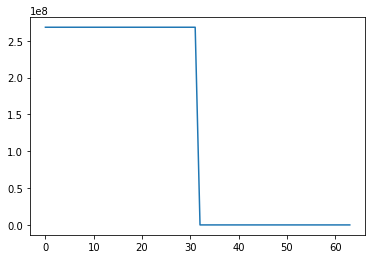

In [70]:
values=struct.unpack('>64l',casperbrd.read("cosmic_ray_thresh_rate2",64*4,0))
plt.plot(values)

In [67]:
#the following also works for unpacking
#data = casperbrd.read("cosmic_ray_thresh_rate2",259)
#byteslength=256
#values=np.ones(int(byteslength/4))
#for i in range(int(byteslength/4)):
#    values[i] = int.from_bytes(data[4*i:(4*i)+4],'big')

In [72]:
print(values[0])
print(values[30])
print(values[31])
print(values[32])

268435455
268435455
268435455
0


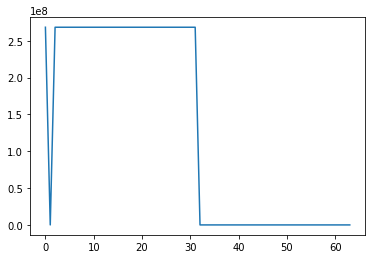

In [74]:
values=struct.unpack('>64l',casperbrd.read("cosmic_ray_thresh_rate1",64*4,0))
plt.plot(values)

268435455
0
268435455
268435455
268435455
268435455
0


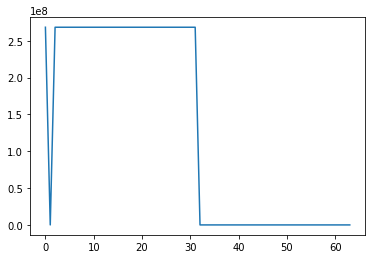

In [83]:
values=struct.unpack('>64l',casperbrd.read("cosmic_ray_veto_thresh_rate1",64*4,0))
plt.plot(values)
print(values[0])
print(values[1])
print(values[2])
print(values[3])
print(values[30])
print(values[31])
print(values[32])

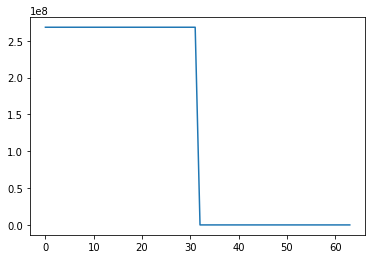

In [86]:
values=struct.unpack('>64l',casperbrd.read("cosmic_ray_veto_thresh_rate3",64*4,0))
plt.plot(values)

The two pairs of BRAMs each have only one antenna with 0 counts (others are 268435455=2^28 -1). This is good but it's weird that the zero is what I read as antenna 1 not antenna 0.

In [2]:
def read_threshold_rates(casperbrd):
    #Reads the shared BRAMs that hold the number of times the individual antennas exceed thresholds in the last 2^28 clock cycles
    #Returns an array of length 64 for the rate each antenna exceeds the core threshold and another for the rate exceeding veto threshold
    #casperbrd is a casperfpga CasperFpga object
    core = np.zeros(64)
    veto = np.zeros(64)
    core[:32]= struct.unpack('>32l',casperbrd.read("cosmic_ray_thresh_rate1",32*4,0))
    core[32:]= struct.unpack('>32l',casperbrd.read("cosmic_ray_thresh_rate2",32*4,0))
    veto[:32]= struct.unpack('>32l',casperbrd.read("cosmic_ray_veto_thresh_rate1",32*4,0))
    veto[32:]= struct.unpack('>32l',casperbrd.read("cosmic_ray_veto_thresh_rate3",32*4,0))
    return core, veto

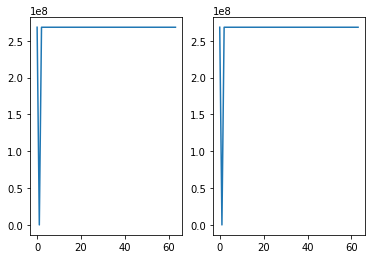

In [96]:
core,veto = read_threshold_rates(casperbrd)
plt.subplot(121)
plt.plot(core)
plt.subplot(122)
plt.plot(veto)

### Check antenna mapping
With the test signal as a constant for each antenna, I set different thresholds to confirm antenna ordering in the SBRAMs.  For example, if the threshold is 25=5^2 then antennas less than and equal to 5 should never exceed the threshold.  The ordering is as desired except that it seems to be off by one in each BRAM, such that the 64 numbers in the array correspond to antennas [31,0,1,2,...30,63,32,33,34,...62].

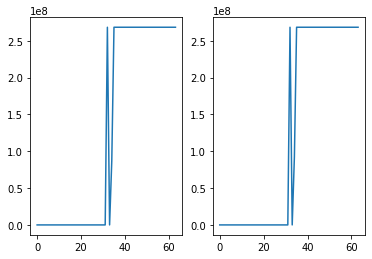

In [124]:
setvalue(casperbrd,"trigger_power_thresh","cr_registers.xlsx",33**2)
setvalue(casperbrd,"veto_power_thresh","cr_registers.xlsx",33**2)

getvalue(casperbrd,"trigger_power_thresh","cr_registers.xlsx")
time.sleep(2)  #have to wait for it to update
core,veto = read_threshold_rates(casperbrd)
plt.subplot(121)
plt.plot(core)
plt.subplot(122)
plt.plot(veto)


## Internally Generated Whitenoise

1. Learn how to turn on noise vector

2. Acquire a snapshot and measure rms

3. measure rate above 1 sigma threshold, confirm it matches expectations

4. Code threshold scan for whitenoise


In [6]:
brdname='snap03'
casperbrd = casperfpga.CasperFpga(brdname, transport=casperfpga.TapcpTransport)
setvalue(casperbrd,'eth_enable','cr_registers.xlsx',0)


In [7]:
brdname='snap01'
casperbrd = casperfpga.CasperFpga(brdname, transport=casperfpga.TapcpTransport)

#load firmware and initialize etc
brd=snap2_fengine.Snap2Fengine(brdname)
brd.program(fpgfile)
#one way to send white noise
brd.initialize()

brd.sync.arm_sync()
brd.sync.sw_sync()




2021-09-28 16:03:24,955 - lwa_f.blocks.block:snap01 - WARNING -  - hostname (10.40.0.157) couldn't be turned into integer serial
2021-09-28 16:03:25,244 - lwa_f.blocks.block:snap01 - INFO - adc - Detected FMC ADC board on port 0
2021-09-28 16:03:25,524 - lwa_f.blocks.block:snap01 - INFO - adc - Detected FMC ADC board on port 1
2021-09-28 16:03:25,537 - lwa_f.snap2_fengine:snap01 - INFO - Loading firmware /home/ubuntu/kplant/caltech-lwa/snap2_f_200msps_64i_4096c/outputs/snap2_f_200msps_64i_4096c_2021-09-23_1421.fpg to snap01
2021-09-28 16:03:50,788 - lwa_f.blocks.block:snap01 - WARNING -  - hostname (10.40.0.157) couldn't be turned into integer serial
2021-09-28 16:03:51,068 - lwa_f.blocks.block:snap01 - INFO - adc - Detected FMC ADC board on port 0
2021-09-28 16:03:51,347 - lwa_f.blocks.block:snap01 - INFO - adc - Detected FMC ADC board on port 1
2021-09-28 16:03:51,360 - lwa_f.snap2_fengine:snap01 - INFO - Initializing block (read only): fpga
2021-09-28 16:03:51,361 - lwa_f.snap2_feng

### Send a snapshot and measure RMS
I set the board to send white noise and then send a snapshot to measure the mean and standard deviation. The plots are confirmation that I've set the noise generator to identical whitenoise on every stream.

In [35]:
setup_data_source(casperbrd,"adc")
setup_ethernet(brdname,casperbrd,fpgfile,'lwacr',100)
#enable ethernet
setvalue(casperbrd,'eth_enable','cr_registers.xlsx',1)
#send trigger
software_trigger(casperbrd,1)



Data source set to adc
------------------------
snap03:cosmic_ray_cr_forty_gbe configuration:
MAC:  02:02:02:03:03:03
Gateway:  0.0.0.1
IP:  10.41.0.203
Fabric port: 
11111
Disabled
	base_ip: 255.255.255.255
	ip_mask: 255.255.255.255
	rx_ips: []
ARP Table: 
IP: 10.41.0.106: MAC: 04:3F:72:DF:C2:F8
Setting wait between packets to 100
Packetizer formed 64 packets
Board successfully returned to listening state after readout
Readout took 22855 clock cycles
Packetizer never overflowed
Ethernet block almost-full counter incremented by 0


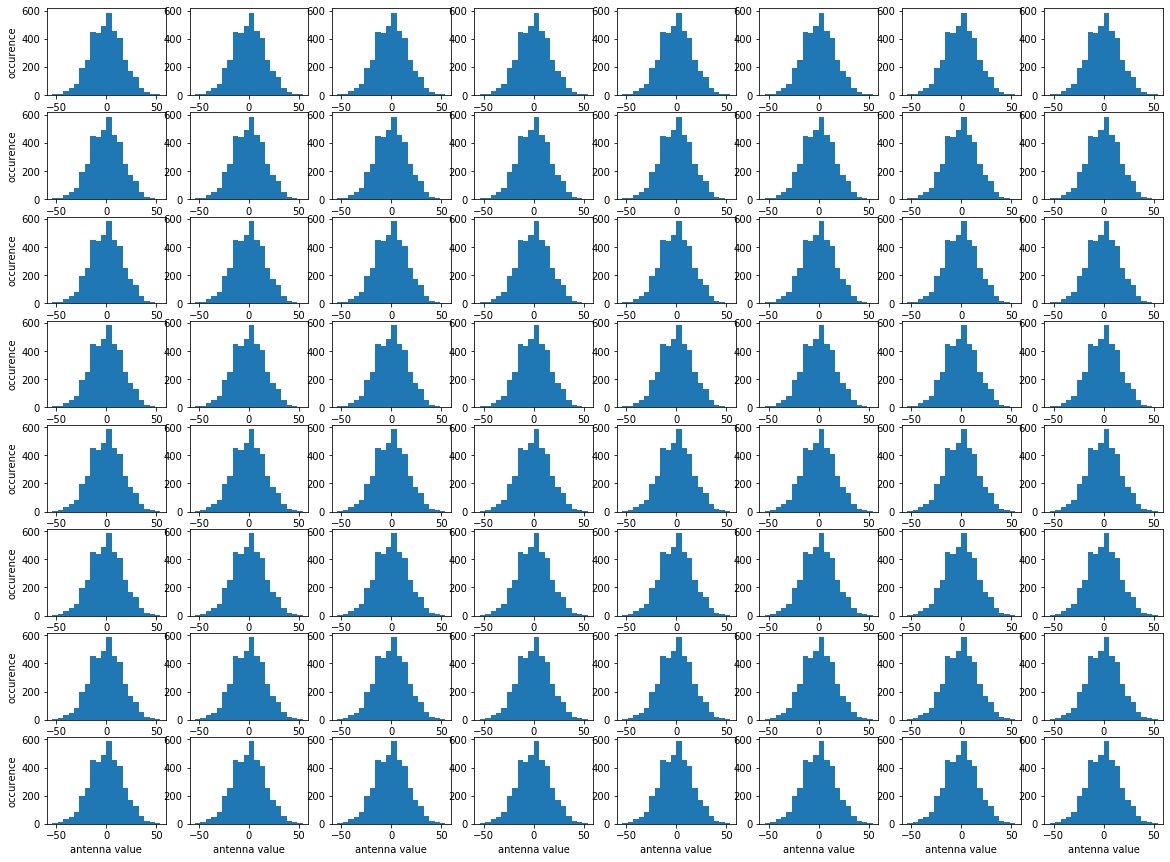

In [36]:
#snapshot=np.load("/home/ubuntu/kplant/caltech-lwa/cosmic_ray_scripts/data_capture/snapshots/single_board_snapshot1632763291.937457.npy")
#snapshot=np.load("/home/ubuntu/kplant/caltech-lwa/cosmic_ray_scripts/data_capture/snapshots/single_board_snapshot1632764475.9161434.npy")
snapshot=np.load("/home/ubuntu/kplant/caltech-lwa/cosmic_ray_scripts/data_capture/snapshots/single_board_snapshot1632764837.0249956.npy")



#plot histogram
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.hist(snapshot[:,i+4],20)
    if i > 55:
        plt.xlabel('antenna value')
    if i%8==0:
        plt.ylabel('occurence')

-0.104248046875
16.282978000940055


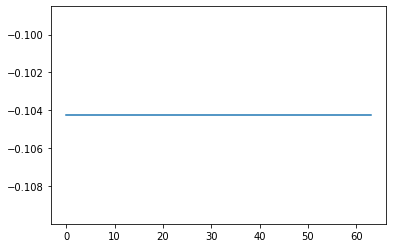

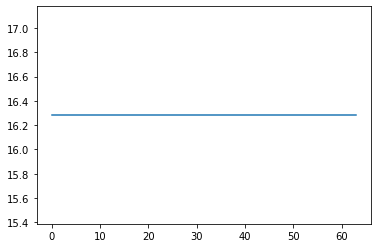

In [41]:
#calculate mean and standard deviation
means=[]
stdvs=[]
for i in range(64):
    timeseries = snapshot[:,i+4]
    means.append(np.mean(timeseries))
    stdvs.append(np.std(timeseries))
plt.figure()
plt.plot(means)
print(means[0])
plt.figure()
plt.plot(stdvs)
print(stdvs[0])

mean=means[0]
stdev = stdvs[0]

### Figure out expectations for threshold scan

If $p=x^2$ and x is normally distributed with standard deviation $\sigma$ and zero mean, then the pdf of p is:

$f(p) = \frac{1}{\sigma \sqrt{2\pi}} e^{\frac{-p}{2 \sigma^2}} p^{-1/2}$

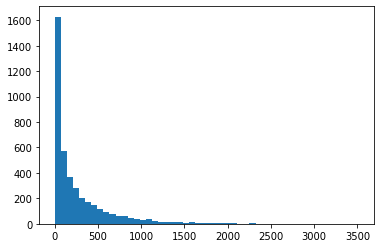

In [46]:
simulatedx = stdev*np.random.randn(4096)
simulatedp = np.square(simulatedx)
plt.hist(simulatedp,50)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

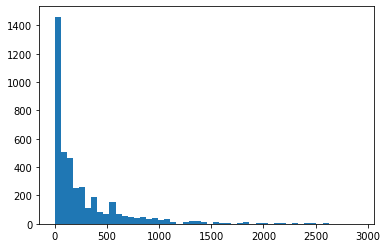

In [50]:
timeseries = snapshot[:,4] #can do this just once since test vector is the same
power = np.square(timeseries)
plt.hist(power,50)
plt.show


The difference may be quantization.

Plot cdf for both
Set threshold to standard deviation and read rate sbram.
Get analytic form of cdf to estimate rate in tails.
DO threshold scan 

In [59]:
def emperical_cdf(t):
    s = np.sort(t)
    plt.plot(s,np.asarray(range(len(s)))/len(s))
    return

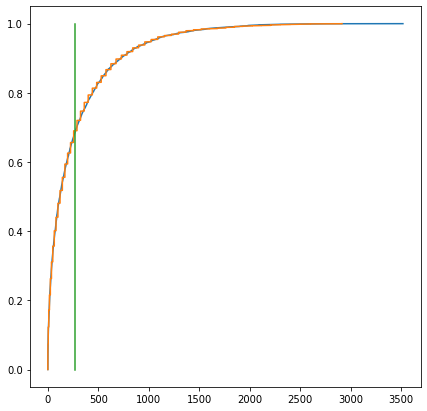

In [66]:
plt.figure(figsize=(7,7))
emperical_cdf(simulatedp)
emperical_cdf(power)
plt.plot([stdev**2,stdev**2],[0,1])#plot a vertical line at standard deviation


### Set threshold to $\sigma^2 = 265.13537 $
There are $2^28$ clock cycles between reads and so I expect (number of threshold excesses)/(2^28) = 1 - 0.6827 = 0.3173

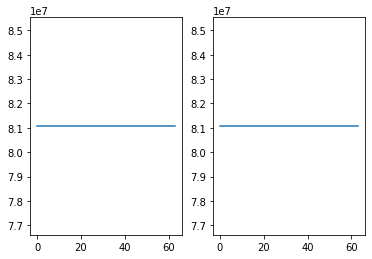

In [71]:
thresh = int(stdev**2)
setvalue(casperbrd,"trigger_power_thresh","cr_registers.xlsx",thresh)
setvalue(casperbrd,"veto_power_thresh","cr_registers.xlsx",thresh)

time.sleep(2)  #have to wait for it to update
core,veto = read_threshold_rates(casperbrd)
plt.subplot(121)
plt.plot(core)
plt.subplot(122)
plt.plot(veto)


All streams had the same number of times exceeding the threshold, which is as expected since they have the same noise.

In [74]:
for i in range(10):
    core,veto = read_threshold_rates(casperbrd)
    time.sleep(2)  #have to wait for it to update
    print(core[0]/(2**28))

0.30200662463903427
0.30197514221072197
0.3019779324531555
0.3019595295190811
0.30198080465197563
0.30195895954966545
0.3019891493022442
0.30202559009194374
0.30200356617569923
0.3019636422395706


Is the fraction low (less than 0.317) because of rounding to the nearest integer for the standard deviation?


In [75]:
#Is the fraction low because of rounding to the nearest integer for the standard deviation
thresh = 266
setvalue(casperbrd,"trigger_power_thresh","cr_registers.xlsx",thresh)
setvalue(casperbrd,"veto_power_thresh","cr_registers.xlsx",thresh)

time.sleep(2)  #have to wait for it to update
for i in range(10):
    core,veto = read_threshold_rates(casperbrd)
    time.sleep(2)  #have to wait for it to update
    print(core[0]/(2**28))

0.3019595071673393
0.30198023840785027
0.30198293551802635
0.30195220559835434
0.3019677586853504
0.30197563022375107
0.3020140677690506
0.30195317789912224
0.3019515238702297
0.3019883893430233


Is the fraction less than 0.317 because of uncertainty on my estimate of the standard deviation? To answer that I need to send more snapshots.  Then, I use the standard deviation of each snapshot as a threshold and measure the rate above that threshold.

In [77]:
for i in range(5):
    software_trigger(casperbrd,1)
    time.sleep(0.5)


Packetizer formed 64 packets
Board successfully returned to listening state after readout
Readout took 22848 clock cycles
Packetizer never overflowed
Ethernet block almost-full counter incremented by 0
Packetizer formed 64 packets
Board successfully returned to listening state after readout
Readout took 22848 clock cycles
Packetizer never overflowed
Ethernet block almost-full counter incremented by 0
Packetizer formed 64 packets
Board successfully returned to listening state after readout
Readout took 22848 clock cycles
Packetizer never overflowed
Ethernet block almost-full counter incremented by 0
Packetizer formed 64 packets
Board successfully returned to listening state after readout
Readout took 22848 clock cycles
Packetizer never overflowed
Ethernet block almost-full counter incremented by 0
Packetizer formed 64 packets
Board successfully returned to listening state after readout
Readout took 22848 clock cycles
Packetizer never overflowed
Ethernet block almost-full counter increme

16.282978000940055 -0.104248046875 0.26991281658411026
16.10699080982859 0.424072265625 0.2574049197137356
15.935170373631236 0.15478515625 0.2414623238146305
16.025423801906165 -0.1240234375 0.2717181146144867
16.331812618300418 0.17236328125 0.2632512114942074
15.789083640317058 0.060546875 0.261984396725893


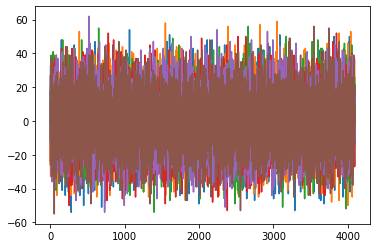

In [91]:
snapshot1=np.load("/home/ubuntu/kplant/caltech-lwa/cosmic_ray_scripts/data_capture/snapshots/single_board_snapshot1632764837.0249956.npy")
snapshot2=np.load("/home/ubuntu/kplant/caltech-lwa/cosmic_ray_scripts/data_capture/snapshots/single_board_snapshot1632783885.6156204.npy")
snapshot3=np.load("/home/ubuntu/kplant/caltech-lwa/cosmic_ray_scripts/data_capture/snapshots/single_board_snapshot1632783889.6266785.npy")
snapshot4=np.load("/home/ubuntu/kplant/caltech-lwa/cosmic_ray_scripts/data_capture/snapshots/single_board_snapshot1632783886.6119733.npy")
snapshot5=np.load("/home/ubuntu/kplant/caltech-lwa/cosmic_ray_scripts/data_capture/snapshots/single_board_snapshot1632783887.6253784.npy")
snapshot6=np.load("/home/ubuntu/kplant/caltech-lwa/cosmic_ray_scripts/data_capture/snapshots/single_board_snapshot1632783888.6168323.npy")

for snapshot in [snapshot1,snapshot2,snapshot3,snapshot4,snapshot5,snapshot6]:
    timeseries = snapshot[:,4]
    stdv = np.std(timeseries)
    m=np.mean(timeseries)
    setvalue(casperbrd,"trigger_power_thresh","cr_registers.xlsx",int(stdv**2))
    setvalue(casperbrd,"veto_power_thresh","cr_registers.xlsx",int(stdv**2))
    time.sleep(2)  #have to wait for it to update
    core,veto = read_threshold_rates(casperbrd)
    print(stdv, m, 1 - core[0]/(2**28))
    plt.plot(timeseries)

I'm surprised how low that is but maybe I sent the software triggers too fast and something went wrong with the snapshots. I capture more snapshots below.

In [88]:
for i in range(10):
    software_trigger(casperbrd,1)
    time.sleep(2)


Packetizer formed 0 packets
Board did not return to listening state after readout. State value = 1
Readout took 0 clock cycles
Packetizer never overflowed
Ethernet block almost-full counter incremented by 0
Packetizer formed 0 packets
Board did not return to listening state after readout. State value = 1
Readout took 0 clock cycles
Packetizer never overflowed
Ethernet block almost-full counter incremented by 0
Packetizer formed 0 packets
Board did not return to listening state after readout. State value = 1
Readout took 0 clock cycles
Packetizer never overflowed
Ethernet block almost-full counter incremented by 0
Packetizer formed 0 packets
Board did not return to listening state after readout. State value = 1
Readout took 0 clock cycles
Packetizer never overflowed
Ethernet block almost-full counter incremented by 0
Packetizer formed 0 packets
Board did not return to listening state after readout. State value = 1
Readout took 0 clock cycles
Packetizer never overflowed
Ethernet block al

15.872877534770614 0.2490234375 0.26485754176974297
15.675954080594227 -0.15087890625 0.25584495440125465
15.755731990928666 -0.017822265625 0.21594026684761047
16.32876874758951 0.041015625 0.24829724803566933
16.055239145867326 -0.01708984375 0.2639716789126396
15.85537060136061 -0.237060546875 0.2550506629049778
16.144281960885642 -0.28955078125 0.2513965405523777
16.059399606151775 -0.21533203125 0.2557354159653187
16.058113300668282 0.443359375 0.2704618386924267
15.992192240883442 0.0166015625 0.2773984931409359


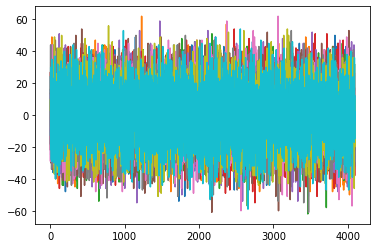

In [114]:
files = ['single_board_snapshot1632784945.7935355.npy',
    'single_board_snapshot1632784948.2895315.npy',
    'single_board_snapshot1632784950.7885873.npy',
    'single_board_snapshot1632784953.2883127.npy',
    'single_board_snapshot1632784955.8004158.npy',
    'single_board_snapshot1632784958.3082454.npy',
    'single_board_snapshot1632784960.8125553.npy',
    'single_board_snapshot1632784963.3170507.npy',
    'single_board_snapshot1632784965.7995155.npy',
    'single_board_snapshot1632784968.285046.npy']

means=[]
stdvs=[]
for f in files:
    snapshot=np.load("/home/ubuntu/kplant/caltech-lwa/cosmic_ray_scripts/data_capture/snapshots/"+f)
    timeseries = snapshot[:,4]
    stdv = np.std(timeseries)
    m=np.mean(timeseries)
    setvalue(casperbrd,"trigger_power_thresh","cr_registers.xlsx",int((m+stdv)**2))
    setvalue(casperbrd,"veto_power_thresh","cr_registers.xlsx",int((m+stdv)**2))
    time.sleep(2)  #have to wait for it to update
    core,veto = read_threshold_rates(casperbrd)
    print(stdv, m, 1 - core[0]/(2**28))
    plt.plot(timeseries)
    means.append(m)
    stdvs.append(stdv)




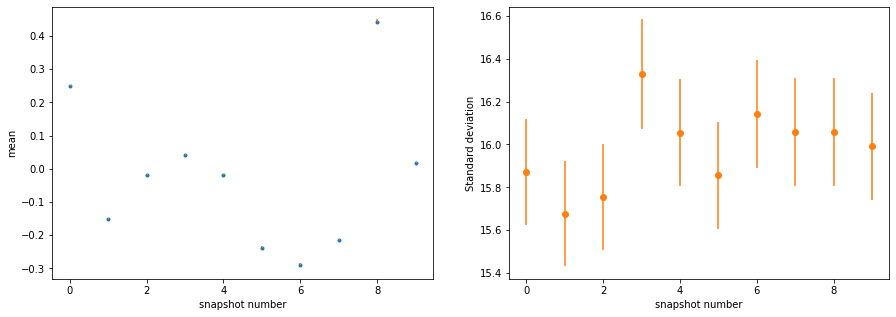

In [115]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(range(len(means)),means,'.')
plt.errorbar(range(len(means)),means,(4096**-0.5)*np.asarray(means),marker=',',ls='none')
plt.xlabel('snapshot number')
plt.ylabel('mean')
plt.subplot(122)
plt.plot(range(len(stdvs)),stdvs,'.')
plt.errorbar(range(len(stdvs)),stdvs,(4096**-0.5)*np.asarray(stdvs),marker='o',ls='none')
plt.xlabel('snapshot number')
plt.ylabel('Standard deviation')

plt.show()

Values above one sigma in the tail of the distribution are much less common than they should be (typically 25\% instead of 32%).  The dynamic range extends to many sigma, so I don't think this can be explained by clipping the distribution.

The mean of a snapshot timeseries fluctuates by more than the standard error on the mean (see plot above where error bars are smaller than marker size), although the stand deviation looks more reasonable.


Next I'll go ahead and make code for a threshold scan, to get a better picture of the cumulative distribution as measured by threshold excess.

## Threshold Scan, internally-generated white noise

In [126]:
thresholds = np.logspace (1,np.log10(2**10),150)
results = []
for t in thresholds:
    setvalue(casperbrd,"trigger_power_thresh","cr_registers.xlsx",int(t**2))
    setvalue(casperbrd,"veto_power_thresh","cr_registers.xlsx",int(t**2))
    time.sleep(2)  #have to wait for it to update
    core,veto = read_threshold_rates(casperbrd)
    results.append(core[0])


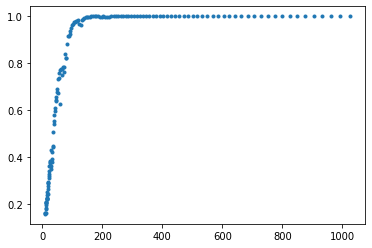

In [132]:
Results =1 - np.asarray(results)/(2**28)
plt.plot(thresholds,Results,'.')

Text(0, 0.5, 'Fraction of Clock Cycles Above Threshold')

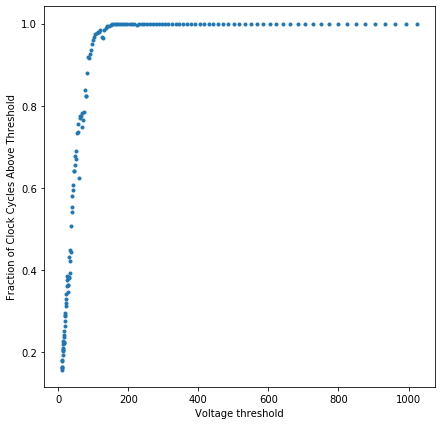

In [135]:
plt.figure(figsize=(7,7))
Results =1 - np.asarray(results)/(2**28)
plt.plot(thresholds,Results,'.')
plt.xlabel("Voltage threshold")
plt.ylabel("Fraction of Clock Cycles Above Threshold")

## Threshold Scan, from sky

In [136]:
#Get data from sky
brd.initialize(read_only=False)
brd.sync.arm_sync()
brd.sync.sw_sync()

2021-09-28 01:09:54,959 - lwa_f.snap2_fengine:snap03 - INFO - Initializing block (writable): fpga
2021-09-28 01:09:54,960 - lwa_f.snap2_fengine:snap03 - INFO - Initializing block (writable): adc
2021-09-28 01:09:54,965 - lwa_f.blocks.block:snap03 - INFO - adc - FMC 0 board 0: Setting clock source to 1
2021-09-28 01:09:54,973 - lwa_f.blocks.block:snap03 - INFO - adc - FMC 0 board 1: Setting clock source to 1
2021-09-28 01:09:54,980 - lwa_f.blocks.block:snap03 - INFO - adc - FMC 1 board 0: Setting clock source to 1
2021-09-28 01:09:54,987 - lwa_f.blocks.block:snap03 - INFO - adc - FMC 1 board 1: Setting clock source to 1
2021-09-28 01:10:04,291 - lwa_f.blocks.block:snap03 - INFO - adc - FMC 0 board 0 clock rates: [490705626, 98163631, 98179591, 0, 0]
2021-09-28 01:10:04,292 - lwa_f.blocks.block:snap03 - INFO - adc - FMC 0 board 0: MMCM locked
2021-09-28 01:10:05,303 - lwa_f.blocks.block:snap03 - INFO - adc - FMC 0 board 1 clock rates: [490686788, 98184732, 98195136, 98208342, 0]
2021-09-

2021-09-28 01:10:17,094 - lwa_f.blocks.block:snap03 - INFO - adc - FMC 0 data lane delays:
[[312, 296, 312, 296, 296, 296, 296, 296], [344, 336, 336, 328, 336, 328, 328, 336], [288, 288, 288, 288, 288, 288, 288, 296], [328, 336, 328, 320, 328, 328, 336, 336], [288, 280, 288, 288, 288, 288, 288, 288], [272, 272, 288, 272, 280, 272, 280, 272], [304, 280, 280, 288, 288, 296, 280, 280], [288, 288, 296, 288, 288, 304, 304, 296]]
2021-09-28 01:10:17,095 - lwa_f.blocks.block:snap03 - INFO - adc - FMC 0 data lane slacks:
[[40, 32, 40, 40, 40, 40, 40, 40], [40, 40, 40, 40, 40, 40, 40, 32], [40, 40, 40, 40, 40, 40, 32, 32], [40, 32, 40, 40, 40, 32, 40, 32], [40, 40, 40, 40, 40, 40, 40, 40], [32, 40, 40, 40, 40, 40, 40, 40], [40, 32, 32, 40, 40, 32, 32, 32], [32, 32, 32, 32, 32, 32, 32, 32]]
2021-09-28 01:10:17,096 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 0, Lane 0:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXX
2021-09-28 01:10:17,097 - lwa_f.blocks.block:snap03 - INF

2021-09-28 01:10:17,125 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 5, Lane 4:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXXX
2021-09-28 01:10:17,126 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 5, Lane 5:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXXXX
2021-09-28 01:10:17,126 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 5, Lane 6:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXXX
2021-09-28 01:10:17,127 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 5, Lane 7:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXXXX
2021-09-28 01:10:17,128 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 6, Lane 0:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXX
2021-09-28 01:10:17,128 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 6, Lane 1:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXXXX
2021-09-28 01:10:17,129 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 6, Lane 2:    XXXXXXXX

2021-09-28 01:10:28,531 - lwa_f.blocks.block:snap03 - INFO - adc - FMC 1 data lane delays:
[[264, 264, 264, 272, 264, 264, 264, 272], [272, 264, 264, 272, 264, 288, 272, 264], [256, 256, 256, 272, 264, 272, 256, 256], [272, 280, 264, 272, 272, 272, 272, 272], [288, 288, 296, 304, 296, 288, 288, 288], [232, 232, 232, 232, 240, 240, 240, 232], [264, 248, 256, 264, 248, 248, 248, 256], [272, 280, 280, 272, 272, 272, 272, 272]]
2021-09-28 01:10:28,532 - lwa_f.blocks.block:snap03 - INFO - adc - FMC 1 data lane slacks:
[[40, 40, 40, 40, 40, 40, 40, 40], [40, 32, 40, 40, 32, 32, 40, 32], [32, 32, 32, 32, 32, 40, 32, 32], [40, 32, 40, 40, 40, 40, 40, 40], [40, 40, 40, 40, 40, 40, 40, 40], [40, 40, 40, 40, 32, 32, 32, 40], [40, 40, 40, 40, 32, 40, 40, 40], [32, 40, 40, 40, 32, 40, 40, 32]]
2021-09-28 01:10:28,533 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 0, Lane 0:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXXXXX
2021-09-28 01:10:28,534 - lwa_f.blocks.block:snap03 - INF

2021-09-28 01:10:28,562 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 5, Lane 4:    XXXXXXXXXXXXXXXXXXXXXXXXXXX---|---XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
2021-09-28 01:10:28,562 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 5, Lane 5:    XXXXXXXXXXXXXXXXXXXXXXXXXXX---|---XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
2021-09-28 01:10:28,563 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 5, Lane 6:    XXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXXXXXXXXX
2021-09-28 01:10:28,564 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 5, Lane 7:    XXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
2021-09-28 01:10:28,564 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 6, Lane 0:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXXXXX
2021-09-28 01:10:28,565 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 6, Lane 1:    XXXXXXXXXXXXXXXXXXXXXXXXXXX----|-----XXXXXXXXXXXXXXXXXXXXXXXXXXX
2021-09-28 01:10:28,565 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 6, Lane 2:    XXXXXXXX

In [44]:
thresholds = np.logspace (1,np.log10(2**10),150)
results_sky = []
for t in thresholds:
    setvalue(casperbrd,"trigger_power_thresh","cr_registers.xlsx",int(t**2))
    setvalue(casperbrd,"veto_power_thresh","cr_registers.xlsx",int(t**2))
    time.sleep(2)  #have to wait for it to update
    core,veto = read_threshold_rates(casperbrd)
    results_sky.append(core)


In [45]:
arr = np.asarray(results_sky)
arr.shape

(150, 64)

Text(0, 0.5, 'Fraction of Clock Cycles below Threshold')

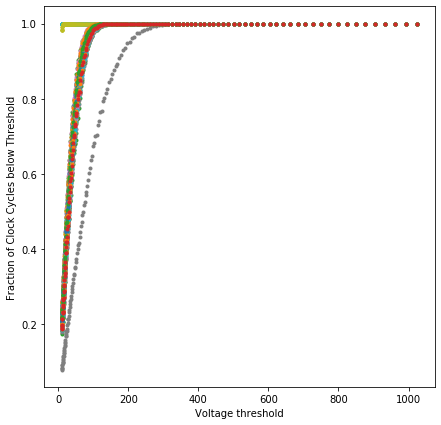

In [48]:
plt.figure(figsize=(7,7))
for i in range(64):
    Results =1 - np.asarray(arr[:,i])/(2**28)
    plt.plot(thresholds,Results,'.')
plt.xlabel("Voltage threshold")
plt.ylabel("Fraction of Clock Cycles below Threshold")

(0, 100)

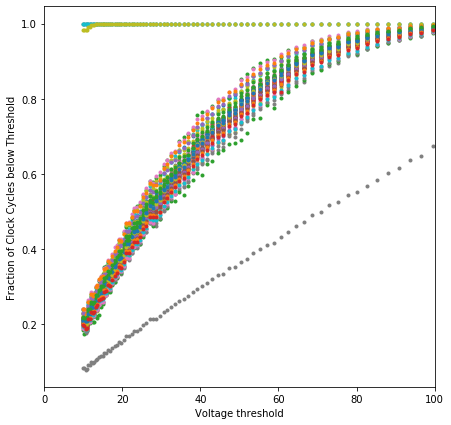

In [55]:
plt.figure(figsize=(7,7))
for i in range(64):
    Results =1 - np.asarray(arr[:,i])/(2**28)
    plt.plot(thresholds,Results,'.')
plt.xlabel("Voltage threshold")
plt.ylabel("Fraction of Clock Cycles below Threshold")
plt.xlim(0,100)

(0, 0.02)

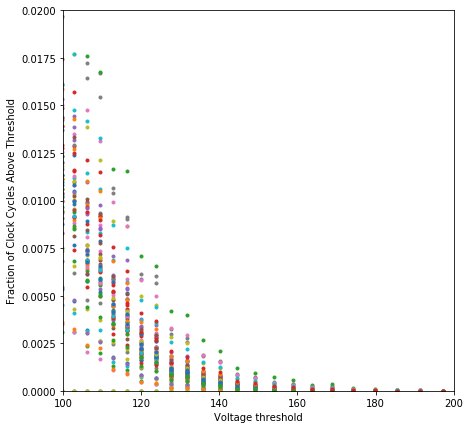

In [54]:
plt.figure(figsize=(7,7))
for i in range(64):
    Results =np.asarray(arr[:,i])/(2**28)
    plt.plot(thresholds,Results,'.')
plt.xlabel("Voltage threshold")
plt.ylabel("Fraction of Clock Cycles Above Threshold")
plt.xlim(100,200)
plt.ylim(0,0.02)


In [ ]:
setvalue(casperbrd,"trigger_power_thresh","cr_registers.xlsx",int(16**2))
setvalue(casperbrd,"veto_power_thresh","cr_registers.xlsx",int(16**2))
time.sleep(2)  #have to wait for it to update
core,veto = read_threshold_rates(casperbrd)

### 9/28/2021

I wondered if I got the odd results with the internally generated noise (25\% instead of 32\% above 1 sigma) because I could have the wrong denominator in that fraction-- what if dividing by 2^28 clock cycles was wrong, if the thresholds somehow weren't incrementing as often as they should. The cells below demonstrate that this is not the case by setting data to constant and thresholds to zero.

In [8]:
setup_data_source(casperbrd,"constant")
setup_ethernet(brdname,casperbrd,fpgfile,'lwacr',100)
#enable ethernet
setvalue(casperbrd,'eth_enable','cr_registers.xlsx',1)
#send trigger
#software_trigger(casperbrd,1)

Data source set to constant
------------------------
snap01:cosmic_ray_cr_forty_gbe configuration:
MAC:  02:02:02:01:01:01
Gateway:  0.0.0.1
IP:  10.41.0.201
Fabric port: 
11111
Disabled
	base_ip: 255.255.255.255
	ip_mask: 255.255.255.255
	rx_ips: []
ARP Table: 
IP: 10.41.0.106: MAC: 04:3F:72:DF:C2:F8
Setting wait between packets to 100


In [9]:
setvalue(casperbrd,"trigger_power_thresh","cr_registers.xlsx",0)
setvalue(casperbrd,"veto_power_thresh","cr_registers.xlsx",0)
time.sleep(2)  #have to wait for it to update
core,veto = read_threshold_rates(casperbrd)

In [11]:
print(core[0])
print(2**28)

268435455.0
268435456


## Next

In [25]:
setup_data_source(casperbrd,"adc")
brd.initialize(read_only=False)


Data source set to adc
2021-09-28 16:21:33,177 - lwa_f.snap2_fengine:snap01 - INFO - Initializing block (writable): fpga
2021-09-28 16:21:33,177 - lwa_f.snap2_fengine:snap01 - INFO - Initializing block (writable): adc
2021-09-28 16:21:33,181 - lwa_f.blocks.block:snap01 - INFO - adc - FMC 0 board 0: Setting clock source to 1
2021-09-28 16:21:33,191 - lwa_f.blocks.block:snap01 - INFO - adc - FMC 0 board 1: Setting clock source to 1
2021-09-28 16:21:33,199 - lwa_f.blocks.block:snap01 - INFO - adc - FMC 1 board 0: Setting clock source to 1
2021-09-28 16:21:33,206 - lwa_f.blocks.block:snap01 - INFO - adc - FMC 1 board 1: Setting clock source to 1
2021-09-28 16:21:41,667 - lwa_f.blocks.block:snap01 - INFO - adc - FMC 0 board 0 clock rates: [490719088, 98238368, 98263922, 0, 0]
2021-09-28 16:21:41,668 - lwa_f.blocks.block:snap01 - INFO - adc - FMC 0 board 0: MMCM locked
2021-09-28 16:21:42,678 - lwa_f.blocks.block:snap01 - INFO - adc - FMC 0 board 1 clock rates: [490740226, 98245659, 98294723

2021-09-28 16:21:54,713 - lwa_f.blocks.block:snap01 - INFO - adc - FMC 0 data lane delays:
[[328, 320, 336, 320, 320, 312, 320, 312], [320, 312, 304, 304, 312, 304, 304, 304], [296, 296, 296, 296, 296, 288, 296, 304], [312, 312, 304, 312, 304, 304, 304, 304], [296, 296, 296, 304, 304, 296, 296, 304], [296, 304, 304, 296, 288, 288, 288, 288], [328, 304, 312, 320, 312, 328, 312, 312], [368, 360, 360, 360, 360, 368, 376, 360]]
2021-09-28 16:21:54,713 - lwa_f.blocks.block:snap01 - INFO - adc - FMC 0 data lane slacks:
[[32, 40, 40, 40, 40, 32, 40, 32], [40, 40, 32, 40, 40, 32, 40, 32], [40, 40, 40, 40, 40, 32, 40, 32], [40, 32, 32, 40, 32, 32, 32, 32], [40, 40, 40, 40, 40, 32, 40, 40], [32, 40, 40, 40, 32, 32, 40, 40], [40, 32, 32, 40, 40, 40, 40, 40], [32, 32, 32, 40, 40, 32, 40, 40]]
2021-09-28 16:21:54,713 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 0, Lane 0:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXX
2021-09-28 16:21:54,714 - lwa_f.blocks.block:snap01 - INF

2021-09-28 16:21:54,733 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 6, Lane 2:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXX
2021-09-28 16:21:54,733 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 6, Lane 3:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXX
2021-09-28 16:21:54,734 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 6, Lane 4:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|-----XXXXXXXXXXXXXXXXXXX
2021-09-28 16:21:54,734 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 6, Lane 5:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXX
2021-09-28 16:21:54,735 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 6, Lane 6:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXX
2021-09-28 16:21:54,735 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 6, Lane 7:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXX
2021-09-28 16:21:54,736 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 7, Lane 0:    XXXXXXXX

2021-09-28 16:21:57,706 - lwa_f.blocks.block:snap01 - INFO - adc - FMC 1 Scanning data delays


2021-09-28 16:22:06,227 - lwa_f.blocks.block:snap01 - INFO - adc - FMC 1 data lane delays:
[[304, 312, 312, 312, 296, 296, 288, 312], [296, 296, 288, 296, 288, 304, 296, 288], [296, 288, 296, 312, 288, 304, 296, 288], [336, 344, 336, 336, 336, 336, 336, 336], [280, 288, 288, 296, 288, 288, 288, 288], [328, 328, 328, 328, 336, 328, 336, 328], [288, 280, 280, 288, 280, 280, 280, 280], [280, 288, 288, 280, 280, 280, 280, 280]]
2021-09-28 16:22:06,228 - lwa_f.blocks.block:snap01 - INFO - adc - FMC 1 data lane slacks:
[[40, 40, 40, 32, 32, 32, 32, 40], [40, 40, 40, 40, 32, 32, 40, 40], [40, 40, 40, 40, 32, 32, 40, 40], [40, 32, 40, 40, 40, 32, 32, 40], [40, 40, 40, 40, 40, 40, 40, 40], [32, 32, 32, 32, 40, 32, 32, 32], [32, 40, 32, 32, 32, 32, 32, 32], [40, 40, 40, 40, 40, 40, 40, 40]]
2021-09-28 16:22:06,228 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 0, Lane 0:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXX
2021-09-28 16:22:06,229 - lwa_f.blocks.block:snap01 - INF

2021-09-28 16:22:06,256 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 6, Lane 2:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXXXX
2021-09-28 16:22:06,257 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 6, Lane 3:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXXX
2021-09-28 16:22:06,257 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 6, Lane 4:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXXXX
2021-09-28 16:22:06,258 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 6, Lane 5:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXXXX
2021-09-28 16:22:06,258 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 6, Lane 6:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXXXX
2021-09-28 16:22:06,259 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 6, Lane 7:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXXXX
2021-09-28 16:22:06,259 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 7, Lane 0:    XXXXXXXX

2021-09-28 16:22:06,260 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 7, Lane 2:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXX
2021-09-28 16:22:06,261 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 7, Lane 3:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXXX
2021-09-28 16:22:06,262 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 7, Lane 4:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXXX
2021-09-28 16:22:06,262 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 7, Lane 5:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXXX
2021-09-28 16:22:06,263 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 7, Lane 6:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXXX
2021-09-28 16:22:06,263 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 7, Lane 7:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXXX
2021-09-28 16:22:10,390 - lwa_f.snap2_fengine:snap01 - INFO - Initializing block (writable): s

In [42]:
software_trigger(casperbrd,1)

Packetizer formed 64 packets
Board successfully returned to listening state after readout
Readout took 22848 clock cycles
Packetizer never overflowed
Ethernet block almost-full counter incremented by 0


40.37591706332797 -2.294677734375 0.7102129980921745
40.829504130648296 -2.2294921875 0.7096184603869915
40.66327405342921 -1.810302734375 0.7132303677499294
40.60459380058111 -2.39697265625 0.7122825421392918
40.122579626365294 -1.98046875 0.7113608978688717
40.32265345432415 -1.62548828125 0.7084676176309586
40.16324055010021 -2.29736328125 0.702763807028532
40.666421583272914 -2.051513671875 0.7115742228925228
40.815910322469705 -2.31396484375 0.7148645184934139
40.98911026516456 -2.17333984375 0.7132862582802773
40.329478616178335 -2.232177734375 0.7172085270285606
39.769895779915785 -2.205322265625 0.7051368653774261
40.919422548819995 -2.412841796875 0.717753604054451
41.0305232014897 -2.223876953125 0.7176496461033821
39.68934989582756 -1.12158203125 0.7197790667414665


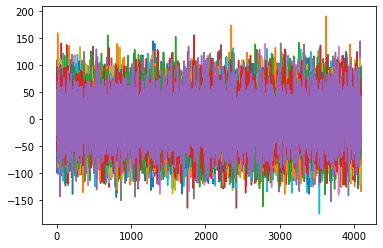

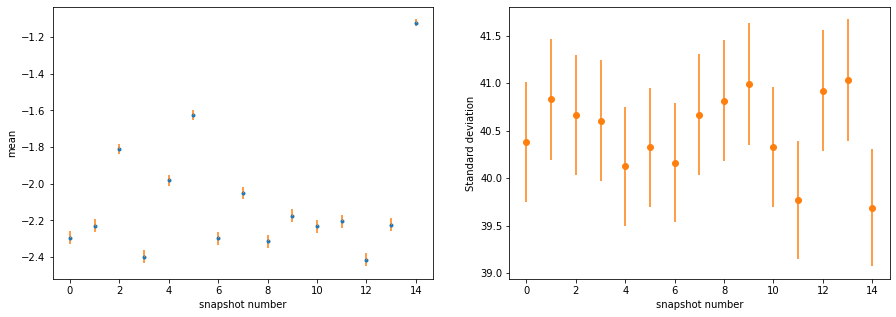

In [43]:
# these are more whitenoise
#files = ["single_board_snapshot1632845789.178383.npy",
#    "single_board_snapshot1632845791.927979.npy",
#    "single_board_snapshot1632845793.9690871.npy",
#    "single_board_snapshot1632845796.09186.npy",
#    "single_board_snapshot1632845798.2900646.npy",
#    "single_board_snapshot1632845801.7753775.npy",
#    "single_board_snapshot1632845805.6395664.npy",
#    "single_board_snapshot1632845808.5597465.npy",
#"single_board_snapshot1632845812.4237947.npy"]

files = ["single_board_snapshot1632846222.7568886.npy",
    "single_board_snapshot1632846225.5378444.npy",
    "single_board_snapshot1632846227.377575.npy",
    "single_board_snapshot1632846229.1868975.npy",
     "single_board_snapshot1632846231.5381985.npy",
    "single_board_snapshot1632846233.3777344.npy",
    "single_board_snapshot1632846235.1176052.npy",
    "single_board_snapshot1632846236.944746.npy",
     "single_board_snapshot1632846238.6382065.npy",
    "single_board_snapshot1632846240.190969.npy",
    "single_board_snapshot1632846242.0773585.npy",
        "single_board_snapshot1632846887.013901.npy",
    "single_board_snapshot1632846891.711227.npy",
    "single_board_snapshot1632846893.9016151.npy",
    "single_board_snapshot1632846895.5463445.npy"]

means=[]
stdvs=[]
for f in files:
    snapshot=np.load("/home/ubuntu/kplant/caltech-lwa/cosmic_ray_scripts/data_capture/snapshots/"+f)
    timeseries = snapshot[:,4]
    stdv = np.std(timeseries)
    m=np.mean(timeseries)
    setvalue(casperbrd,"trigger_power_thresh","cr_registers.xlsx",int((m+stdv)**2))
    setvalue(casperbrd,"veto_power_thresh","cr_registers.xlsx",int((m+stdv)**2))
    time.sleep(2)  #have to wait for it to update
    core,veto = read_threshold_rates(casperbrd)
    print(stdv, m, 1 - (core[0]/(2**28)))
    plt.plot(timeseries)
    means.append(m)
    stdvs.append(stdv)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(range(len(means)),means,'.')
plt.errorbar(range(len(means)),means,(4096**-0.5)*np.asarray(means),marker=',',ls='none')
plt.xlabel('snapshot number')
plt.ylabel('mean')
plt.subplot(122)
plt.plot(range(len(stdvs)),stdvs,'.')
plt.errorbar(range(len(stdvs)),stdvs,(4096**-0.5)*np.asarray(stdvs),marker='o',ls='none')
plt.xlabel('snapshot number')
plt.ylabel('Standard deviation')

plt.show()